# Retinal OCT Images (optical coherence tomography)

<h1>1. Business Problem </h1>

<h2> 1.1 Description </h2>

## Context

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (NORMAL,CNV,DME,DRUSEN). There are 84,495 X-Ray images (JPEG) and 4 categories (NORMAL,CNV,DME,DRUSEN).

Images are labeled as (disease)-(randomized patient ID)-(image number by this patient) and split into 4 directories: CNV, DME, DRUSEN, and NORMAL.

Optical coherence tomography (OCT) images (Spectralis OCT, Heidelberg Engineering, Germany) were selected from retrospective cohorts of adult patients from the Shiley Eye Institute of the University of California San Diego, the California Retinal Research Foundation, Medical Center Ophthalmology Associates, the Shanghai First People’s Hospital, and Beijing Tongren Eye Center between July 1, 2013 and March 1, 2017.

<h2> 1.2 Source / useful links </h2>

DataSource : https://www.kaggle.com/paultimothymooney/kermany2018 <br>
<!-- Citation : http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5 -->

<h2> 1.3 Real World / Business Objectives and Constraints </h2>

-  No strict latency constraints.
-  Single class classification problem.

<h1>2. Machine Learning Probelm </h1>

<h2> 2.1 Data </h2>

### File contents
Image format: 84,495 images, 4 categories

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p> It is a one class classification problem, for a given image we need to predict if they are suffering from which disease. </p>

<h3> 2.2.2 Performance Metric </h3>

Metric(s): 
* Categorical Crossentropy
* Confusion Matrix

<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the class of each image belonging to each of the four classes.
</p>
<p> Constraints:
</p>
<!-- * Penalize the errors in class probabilites. -->
* No Latency constraints.

In [2]:
import matplotlib.pyplot as plt
import cv2
import os
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import random

In [6]:
print(os.listdir("./tcga_coad_msi_mss/"))

['CNV', 'DME', 'DRUSEN', 'NORMAL']


* We have two folder which contain images of that class type.


In [7]:
normal_len = len(os.listdir("./tcga_coad_msi_mss/train/MSS"))
drusen_len = len(os.listdir("./oct2017/OCT2017/train/DRUSEN"))
cnv_len = len(os.listdir("./oct2017/OCT2017/train/CNV"))
dme_len = len(os.listdir("./oct2017/OCT2017/train/DME"))

In [8]:
print("length of normal images = ",normal_len)
print("length of images with disease drusen = ",drusen_len)
print("length of images with disease cnv = ",cnv_len)
print("length of images with disease dme = ",dme_len)


length of normal images =  26315
length of images with disease drusen =  8616
length of images with disease cnv =  37205
length of images with disease dme =  11348


### Now checking the shapes of images in every class

In [9]:
files = os.listdir("./oct2017/OCT2017/train/NORMAL/")
size = []
for i in tqdm(range(len(files))):
    img = cv2.imread("./oct2017/OCT2017/train/NORMAL/"+files[i])
    #print("image size = ",img.shape)
    size.append(img.shape)
print("There are different sizes of NORMAL images, they are = ",set(size))

100%|██████████| 26315/26315 [12:33<00:00, 34.90it/s]

There are different sizes of NORMAL images, they are =  {(496, 512, 3), (496, 1024, 3), (512, 512, 3), (496, 384, 3), (496, 1536, 3), (496, 768, 3)}


In [15]:
files = os.listdir("./oct2017/OCT2017/train/DRUSEN/")
size = []
for i in tqdm(range(len(files))):
    img = cv2.imread("./oct2017/OCT2017/train/DRUSEN/"+files[i])
    #print("image size = ",img.shape)
    size.append(img.shape)
print("There are different sizes of DRUSEN images, they are = ",set(size))

100%|██████████| 8616/8616 [00:33<00:00, 256.79it/s]

There are different sizes of DRUSEN images, they are =  {(496, 512, 3), (496, 768, 3), (496, 1536, 3), (496, 1024, 3)}


In [12]:
files = os.listdir("./oct2017/OCT2017/train/CNV/")
size = []
for i in tqdm(range(len(files))):
    img = cv2.imread("./oct2017/OCT2017/train/CNV/"+files[i])
    #print("image size = ",img.shape)
    size.append(img.shape)
print("There are different sizes of CNV images, they are = ",set(size))

100%|██████████| 37205/37205 [07:43<00:00, 80.26it/s] 

There are different sizes of CNV images, they are =  {(496, 512, 3), (496, 1024, 3), (496, 384, 3), (496, 1536, 3), (496, 768, 3)}


In [13]:
files = os.listdir("./oct2017/OCT2017/train/DME/")
size = []
for i in tqdm(range(len(files))):
    img = cv2.imread("./oct2017/OCT2017/train/DME/"+files[i])
    #print("image size = ",img.shape)
    size.append(img.shape)
print("There are different sizes of DME images, they are = ",set(size))

100%|██████████| 11348/11348 [01:39<00:00, 113.99it/s]

There are different sizes of DME images, they are =  {(496, 512, 3), (496, 1024, 3), (512, 512, 3), (496, 1536, 3), (496, 768, 3)}


### Showing some images from every class and in all channel seperately

Five images from class - NORMAL


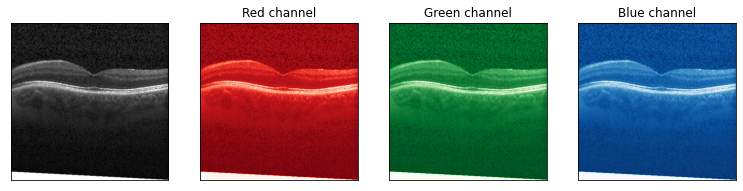

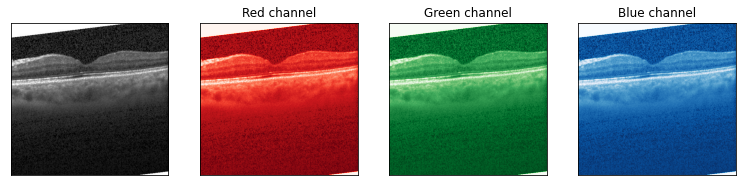

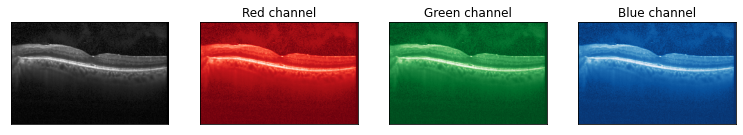

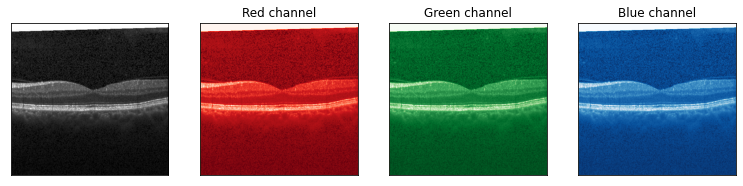

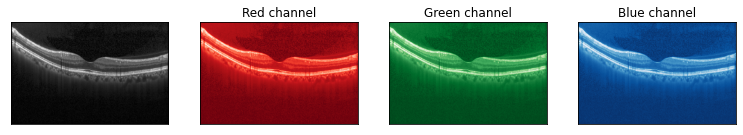

In [16]:
# https://stackoverflow.com/questions/37431599/how-to-slice-an-image-into-red-green-and-blue-channels-with-misc-imread
files = os.listdir("./oct2017/OCT2017/train/NORMAL/")
titles = ['', 'Red channel', 'Green channel', 'Blue channel']
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

print('Five images from class - NORMAL')
for i in range(5):
    image = cv2.imread("./oct2017/OCT2017/train/NORMAL/"+random.choice(files))
    
    fig, axes = plt.subplots(1, 4, figsize=(13,3))
    objs = zip(axes, (image, *image.transpose(2,0,1)), titles, cmaps)
    
    for ax, channel, title, cmap in objs:
        ax.imshow(channel, cmap=cmap)
        ax.set_title(title)
        ax.set_xticks(())
        ax.set_yticks(())

Five images from class - DRUSEN


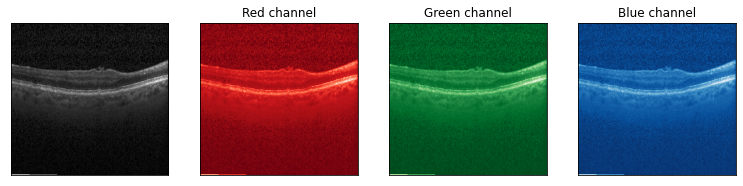

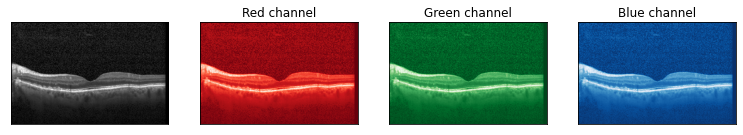

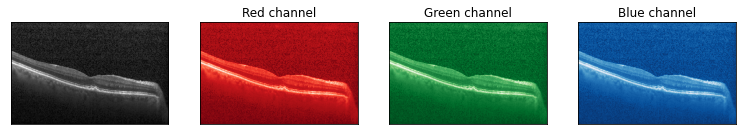

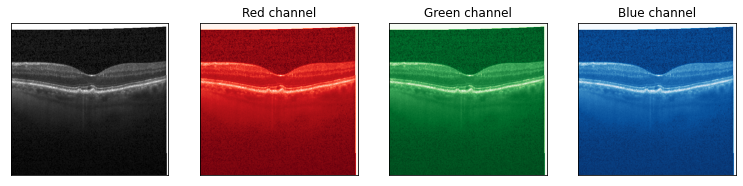

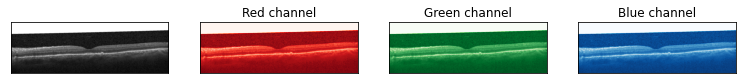

In [17]:
# https://stackoverflow.com/questions/37431599/how-to-slice-an-image-into-red-green-and-blue-channels-with-misc-imread
files = os.listdir("./oct2017/OCT2017/train/DRUSEN/")
titles = ['', 'Red channel', 'Green channel', 'Blue channel']
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

print('Five images from class - DRUSEN')
for i in range(5):
    image = cv2.imread("./oct2017/OCT2017/train/DRUSEN/"+random.choice(files))
    
    fig, axes = plt.subplots(1, 4, figsize=(13,3))
    objs = zip(axes, (image, *image.transpose(2,0,1)), titles, cmaps)
    
    for ax, channel, title, cmap in objs:
        ax.imshow(channel, cmap=cmap)
        ax.set_title(title)
        ax.set_xticks(())
        ax.set_yticks(())

Five images from class - CNV


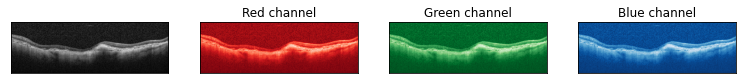

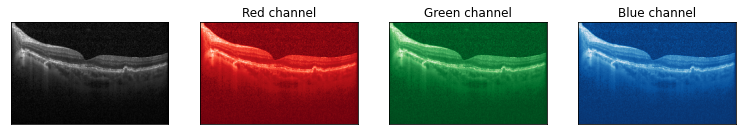

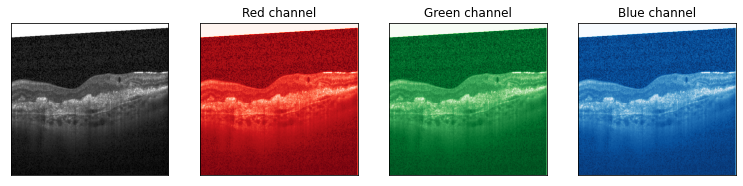

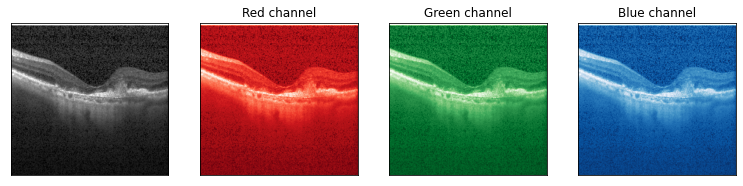

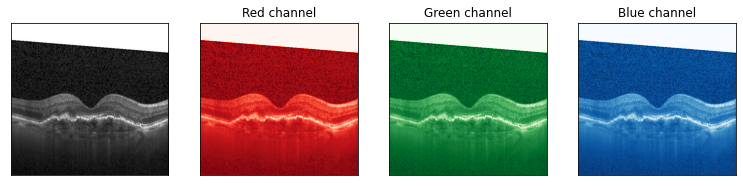

In [18]:
# https://stackoverflow.com/questions/37431599/how-to-slice-an-image-into-red-green-and-blue-channels-with-misc-imread
files = os.listdir("./oct2017/OCT2017/train/CNV/")
titles = ['', 'Red channel', 'Green channel', 'Blue channel']
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

print('Five images from class - CNV')
for i in range(5):
    image = cv2.imread("./oct2017/OCT2017/train/CNV/"+random.choice(files))
    
    fig, axes = plt.subplots(1, 4, figsize=(13,3))
    objs = zip(axes, (image, *image.transpose(2,0,1)), titles, cmaps)
    
    for ax, channel, title, cmap in objs:
        ax.imshow(channel, cmap=cmap)
        ax.set_title(title)
        ax.set_xticks(())
        ax.set_yticks(())

Five images from class - DME


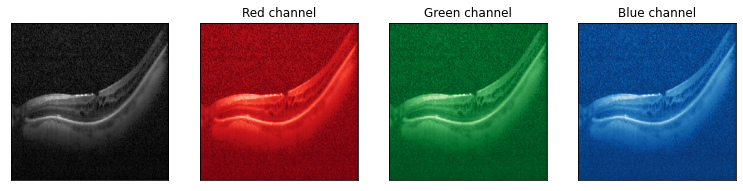

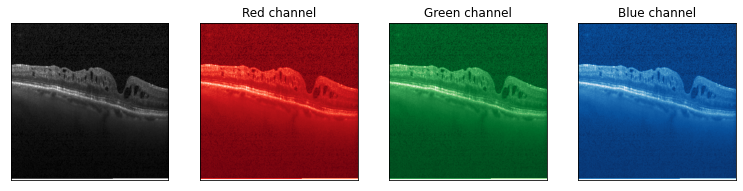

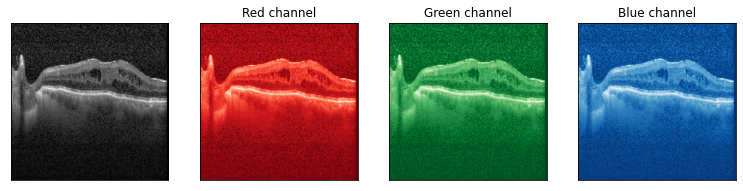

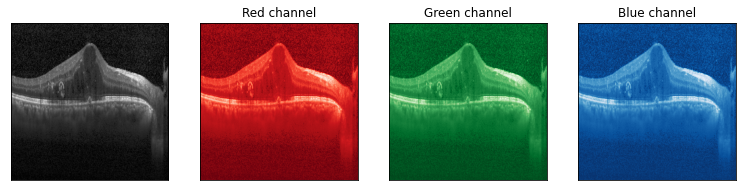

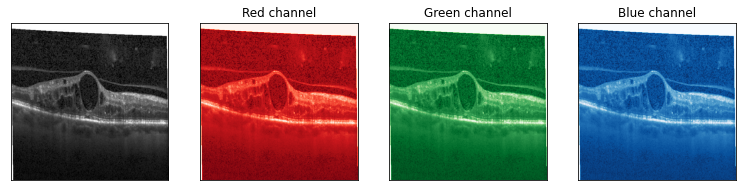

In [19]:
# https://stackoverflow.com/questions/37431599/how-to-slice-an-image-into-red-green-and-blue-channels-with-misc-imread
files = os.listdir("./oct2017/OCT2017/train/DME/")
titles = ['', 'Red channel', 'Green channel', 'Blue channel']
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

print('Five images from class - DME')
for i in range(5):
    image = cv2.imread("./oct2017/OCT2017/train/DME/"+random.choice(files))
    
    fig, axes = plt.subplots(1, 4, figsize=(13,3))
    objs = zip(axes, (image, *image.transpose(2,0,1)), titles, cmaps)
    
    for ax, channel, title, cmap in objs:
        ax.imshow(channel, cmap=cmap)
        ax.set_title(title)
        ax.set_xticks(())
        ax.set_yticks(())

* As we can see that the images are not in same shape. We have to bring all the images into same shape.
* We can also perform normalization in the image.
* All of these we can do using ImageDataGenerator.

### Bringing all images into same shape

In [20]:
labels = os.listdir('./oct2017/OCT2017/train/')
IMG_SIZE = 224
train_data_dir = './oct2017/OCT2017/train'
train_datagen = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_SIZE , IMG_SIZE),
    batch_size=16,
    class_mode='categorical')


Found 83484 images belonging to 4 classes.


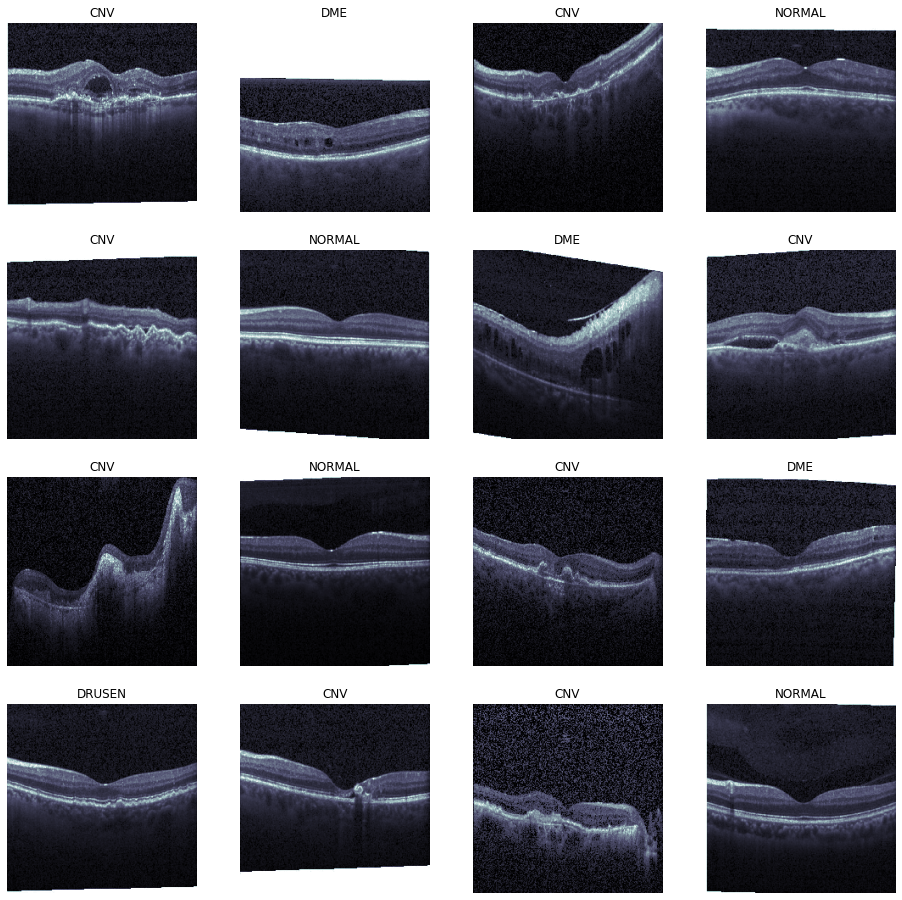

In [21]:
t_x, t_y = next(train_generator)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone')
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(labels, c_y) 
                             if n_score>0.5]))
    c_ax.axis('off')

### Observation - 
* We have successfully bring all the images in same shape.
* We can also apply image augmentation
* Now we will use pre-trained model on this dataset.
* As we can see that the sizes of images are in three dimension and also showed some images in seperate channel. Thus we can use models like inception net, resnet etc.